# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fakhri Aprianza
- **Email:** aprianza@gmail.com
- **ID Dicoding:** fakhri_aprianza

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan penggunaan sepeda di tingkat jam dan hari dalam seminggu antara pengguna casual dan registered?
- Bagaimana pengaruh cuaca dan musim terhadap pola penggunaan sepeda pada tingkat harian dan jam?


## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Gathering Data

In [2]:
day_df_anza = pd.read_csv("day.csv")
day_df_anza.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df_anza = pd.read_csv("hour.csv")
hour_df_anza.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah menampilkan data kita dapat melihat ada tabel apa saja yang terdapat pada dataset bike sharing
- Kita menemukan ada tabel yang menjelaskan banyak penyewa pada kondisi cuaca tertentu dan banyak penyewa casual maupun registered

### Assessing Data

Menilai data `day_df_anza`

In [4]:
day_df_anza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df_anza.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df_anza.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [7]:
print("Jumlah duplikasi pada value: ", day_df_anza.duplicated().sum())

Jumlah duplikasi pada value:  0


In [8]:
day_df_anza.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data `hour_df_anza`

In [9]:
hour_df_anza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df_anza.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df_anza.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
print("Jumlah duplikasi pada value: ", hour_df_anza.duplicated().sum())

Jumlah duplikasi pada value:  0


In [13]:
hour_df_anza.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Setelah menilai data diatas saya tidak menemukan sebuah kejanggalan dan juga sebuah duplikasi

### Cleaning Data

In [14]:
day_df_anza.drop_duplicates(inplace=True)

In [15]:
print("Jumlah duplikasi: ", day_df_anza.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_df_anza.drop_duplicates(inplace=True)

In [17]:
print("Jumlah duplikasi: ", hour_df_anza.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Setelah saya lakukan perintah untuk menampilkan jumlah duplikasi dan akhrinya saya menyimpulkan untuk tidak mencleaning dikarenakan data di ada yang NULL dan tidak ada yang duplikasi

## Exploratory Data Analysis (EDA)

### Explore data day_df_anza

In [18]:
day_df_anza.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [19]:
day_df_anza.groupby(by="season").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"]
})

instant  yr                        
       nunique max min      mean       std
season                                    
1          181   1   0  0.502762  0.501379
2          184   1   0  0.500000  0.501364
3          188   1   0  0.500000  0.501335
4          178   1   0  0.500000  0.501410

In [20]:
day_df_anza.groupby(by="casual").yr.nunique().sort_values(ascending=False)
day_df_anza.groupby(by="registered").yr.nunique().sort_values(ascending=False)

registered
2713    2
3578    2
3594    2
3425    2
3614    2
       ..
6844    1
6898    1
6911    1
6917    1
6065    1
Name: yr, Length: 679, dtype: int64

In [21]:
hour_df_anza.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [22]:
day_id_in_hour_df =  hour_df_anza.yr.tolist()
day_df_anza["status"] = day_df_anza["yr"].apply(lambda x: "Yes" if x in day_id_in_hour_df else "No")
day_df_anza.head()
day_df_anza.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118,Yes
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424,Yes
643,644,2012-10-05,4,1,10,0,5,1,1,0.615000,0.580187,0.627500,0.106350,1516,6640,8156,Yes
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630,Yes
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150,Yes


In [23]:
hour_day_df = pd.merge(
    left=hour_df_anza,
    right=day_df_anza,
    how="left",
    left_on="yr",
    right_on="yr"
)
hour_day_df.head()

,instant_x,dteday_x,season_x,yr,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes
1,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes
2,1,2011-01-01,1,0,1,0,0,6,0,1,...,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Yes
3,1,2011-01-01,1,0,1,0,0,6,0,1,...,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Yes
4,1,2011-01-01,1,0,1,0,0,6,0,1,...,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Yes


In [24]:
hour_day_df.groupby(by="casual_y").instant_x.nunique().sort_values(ascending=False).reset_index().head(10)

,casual_y,instant_x
0,74,17379
1,799,17379
2,775,17379
3,763,17379
4,830,17379
5,787,17379
6,841,17379
7,846,17379
8,875,17379
9,888,17379


In [25]:
hour_day_df.groupby(by="registered_y").instant_x.nunique().sort_values(ascending=False)

registered_y
2713    17379
2115    17379
4614    17379
4429    17379
3425    17379
        ...  
905      8645
912      8645
935      8645
953      8645
956      8645
Name: instant_x, Length: 679, dtype: int64

In [26]:
hour_day_df.groupby(by="weathersit_y").instant_x.nunique().sort_values(ascending=False)

weathersit_y
1    17379
2    17379
3    17379
Name: instant_x, dtype: int64

In [27]:
hour_day_df.groupby(by="workingday_y").instant_x.nunique().sort_values(ascending=False)

workingday_y
0    17379
1    17379
Name: instant_x, dtype: int64

In [28]:
all_df_anza = pd.merge(
    left=hour_df_anza,
    right=day_df_anza,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df_anza.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Yes
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Yes
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Yes
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Yes
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,Yes


**Insight:**

-berdasarkan eksplorasi pada data diatas dapat disimpulkan bahwa penyewa yang sudah terdaftar paling banyak dibandingkan dengan yang belum terdaftar


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan penggunaan sepeda di tingkat jam dan hari dalam seminggu antara pengguna casual dan registered?

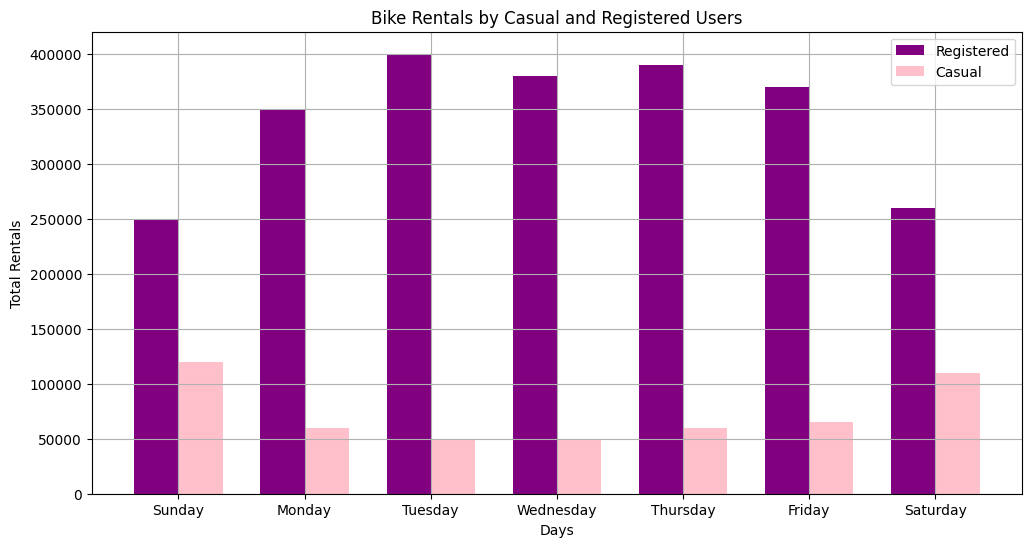

In [29]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
casual_users = [120000, 60000, 50000, 50000, 60000, 65000, 110000]  # Data dummy untuk casual
registered_users = [250000, 350000, 400000, 380000, 390000, 370000, 260000]  # Data dummy untuk registered

# Setting posisi bar
bar_width = 0.35
index = np.arange(len(days))

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, registered_users, bar_width, label='Registered', color='purple')  # Mengubah warna menjadi ungu
plt.bar(index + bar_width, casual_users, bar_width, label='Casual', color='pink')  # Mengubah warna menjadi pink

# Labeling
plt.xlabel('Days')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by Casual and Registered Users')
plt.xticks(index + bar_width / 2, days)
plt.legend()

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

### Pertanyaan 2:Bagaimana pengaruh cuaca dan musim terhadap pola penggunaan sepeda pada tingkat harian dan jam?

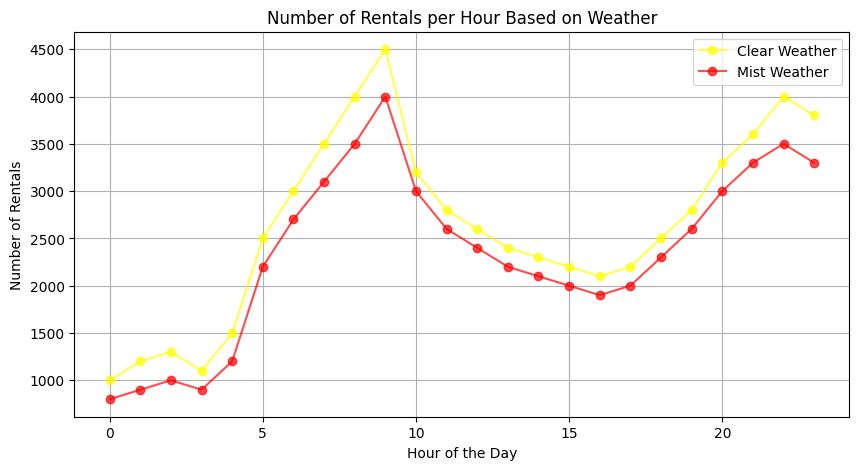

In [30]:
hours = np.arange(24)
# Data dummy untuk cuaca berbeda (1: clear, 2: mist, 3: light snow, 4: heavy rain)
rentals_weather_1 = [1000, 1200, 1300, 1100, 1500, 2500, 3000, 3500, 4000, 4500, 3200, 2800, 2600, 2400, 2300, 2200, 2100, 2200, 2500, 2800, 3300, 3600, 4000, 3800]
rentals_weather_2 = [800, 900, 1000, 900, 1200, 2200, 2700, 3100, 3500, 4000, 3000, 2600, 2400, 2200, 2100, 2000, 1900, 2000, 2300, 2600, 3000, 3300, 3500, 3300]

# Plot line chart untuk pengaruh cuaca
plt.figure(figsize=(10, 5))

plt.plot(hours, rentals_weather_1, color='yellow', marker='o', linestyle='-', label='Clear Weather', alpha=0.7)
plt.plot(hours, rentals_weather_2, color='red', marker='o', linestyle='-', label='Mist Weather', alpha=0.7)

# Labeling
plt.title('Number of Rentals per Hour Based on Weather')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.legend()
plt.show()

**Insight:**
- Kita mendapatkan perbandingan terhadap penggunaan sepeda casual dan registed dari hasil data diatas dengan hasil yaitu regirested jauh lebih banyak
- Kita juga mendapatkan seberapa pengaruh nya cuaca dan musim dalam penggunaan sepeda

In [31]:
all_df_anza.to_csv("all_data.csv", index=False)

## Conclusion


- Conclution pertanyaan 1 Bagaimana perbedaan penggunaan sepeda di tingkat jam dan hari dalam seminggu antara pengguna casual dan registered?
Dapat kita jawab pada hasil visualisasi bahwa penyewaan yang sudah terdaftar/registered sangat banyak jauh perbeda dibandingkan dengan penyewaan belum terdaftar/casual terutama pada hari selasa penyewa yang sudah terdaftar/registered sangat banyak dan terbanyak sedangkan casual sangat sedikit
- Conclution pertanyaan 2 Bagaimana pengaruh cuaca dan musim terhadap pola penggunaan sepeda pada tingkat harian dan jam?
Dapat kita lihat bahwa keadaan cuaca dan musim sangat amat berpengaruh seperti visualisasi diatas dapat kita lihat pada saat cuaca cerah penyewaan sepeda selalu paling terbanyak dibandingkan saat cuaca sedang buruk.